# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:

# Import API key
from api_keys import api_key

api_key = "8165be83ffd566a27e36bf03d2941c66"

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#Get weather data
print("Beginning Data Retrival")
print("------------------------------")
record = 1
set = 1
# create a list to hold response info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

for city in cities:
    response = requests.get(f"{url}&q={city}").json()
        
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} of Set{set} | {city_record}")
               
        # Increase counter by one 
        record= record + 1
        set = set +1  #couldnt figure out how to group the set      
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
         

Beginning Data Retrival
------------------------------
Processing Record 1 of Set1 | Mataura
Processing Record 2 of Set2 | Saldanha
Processing Record 3 of Set3 | Hato Mayor
Processing Record 4 of Set4 | Yellowknife
Processing Record 5 of Set5 | Punta Arenas
City not found. Skipping...
Processing Record 6 of Set6 | Southbridge
Processing Record 7 of Set7 | Arraial do Cabo
City not found. Skipping...
Processing Record 8 of Set8 | Hermanus
Processing Record 9 of Set9 | Qaanaaq
Processing Record 10 of Set10 | Jamestown
Processing Record 11 of Set11 | Makakilo City
Processing Record 12 of Set12 | Novoaltaysk
Processing Record 13 of Set13 | Norman Wells
Processing Record 14 of Set14 | Saint-Philippe
Processing Record 15 of Set15 | Atuona
Processing Record 16 of Set16 | Kruisfontein
Processing Record 17 of Set17 | Tara
City not found. Skipping...
Processing Record 18 of Set18 | Vaini
Processing Record 19 of Set19 | Barrow
Processing Record 20 of Set20 | Progreso
Processing Record 21 of Set21 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a data frame from dictionary 
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()   

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [5]:
# Export the city data into a .csv
weather_data.to_csv("weather_data.csv")

#Display our DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,0,NZ,1554626406,84,-46.19,168.86,48.99,1.61
1,Saldanha,48,PT,1554626563,76,41.42,-6.55,45.77,4.63
2,Hato Mayor,20,DO,1554624000,94,18.76,-69.26,71.60,4.70
3,Yellowknife,92,CA,1554626183,79,62.45,-114.38,19.00,11.01
4,Punta Arenas,40,CL,1554625949,56,-53.16,-70.91,42.80,3.36


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

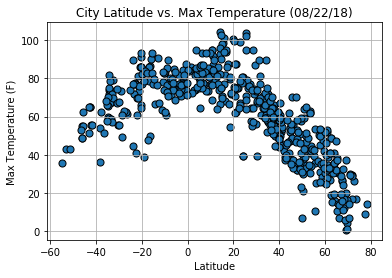

<Figure size 432x288 with 0 Axes>

In [6]:
# Latitude Vs Max Temperature plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"],marker="o",s=50,edgecolor="black")

# x-axis and y-axis label 
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Latitude_vs_Max_Temperature.png")


#### Latitude vs. Humidity Plot

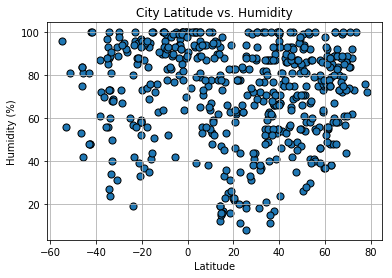

<Figure size 432x288 with 0 Axes>

In [10]:
# Latitude Vs Max Humidity plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"],marker="o",s=50,edgecolor="black")

# x-axis and y-axis label 
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")


#### Latitude vs. Cloudiness Plot

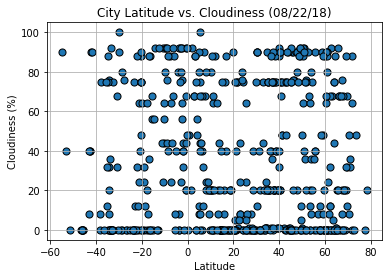

<Figure size 432x288 with 0 Axes>

In [11]:
# Latitude Vs Cloudiness plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"],marker="o",s=50,edgecolor="black")

# x-axis and y-axis label 
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")


#### Latitude vs. Wind Speed Plot

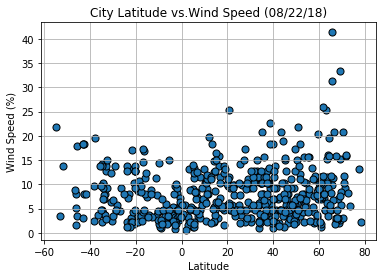

<Figure size 432x288 with 0 Axes>

In [12]:
# Latitude Vs Max Humidity plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"],marker="o",s=50,edgecolor="black")

# x-axis and y-axis label 
plt.title("City Latitude vs.Wind Speed (08/22/18)" )
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

# Save the figure
plt.savefig("Latitude_vs_Wing Speed.png")